We are following [this](https://github.com/radekosmulski/ACT_refactor/blob/main/Action_Chunking_Transformer_inference_with_previously_trained_model_LeRobot_data_and_preprocessing.ipynb?ref=radekosmulski.com) code

In [1]:
!which python
!ls

/home/absin/Documents/git/robotics/act_algorithm/venv/bin/python
1_act_inference_with_pretrained.ipynb  example_insert.mp4  example.mp4	venv


In [2]:
!pwd

/home/absin/Documents/git/robotics/act_algorithm


In [ ]:
!pip install gym-aloha

In [49]:
import imageio
import gymnasium as gym
import numpy as np
import gym_aloha
import numpy
import torch


In [60]:
env = gym.make("gym_aloha/AlohaTransferCube-v0",obs_type="pixels_agent_pos",max_episode_steps=300,)
observation, info = env.reset()
frames = []

In [61]:
for _ in range(300):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    image = env.render()
    frames.append(image)

    if terminated or truncated:
        observation, info = env.reset()

env.close()
imageio.mimsave("1.mp4", np.stack(frames), fps=25)

In [63]:
from lerobot.common.policies.act.modeling_act import ACTPolicy
pretrained_path = "/home/absin/Documents/git/robotics/act_algorithm/trained_model/act_aloha_sim_transfer_cube_human"
policy = ACTPolicy.from_pretrained(pretrained_path)
policy.reset()
numpy_observation, info = env.reset(seed=42)
rewards = []
frames = []
# Render frame of the initial state
frames.append(env.render())
step = 0
done = False
device = 'cpu'
while not done:
    # Prepare observation for the policy running in Pytorch
    state = torch.from_numpy(numpy_observation["agent_pos"])
    image = torch.from_numpy(numpy_observation["pixels"]["top"])

    # Convert to float32 with image from channel first in [0,255]
    # to channel last in [0,1]
    state = state.to(torch.float32)
    image = image.to(torch.float32) / 255
    image = image.permute(2, 0, 1)

    # Send data tensors from CPU to GPU
    state = state.to(device, non_blocking=True)
    image = image.to(device, non_blocking=True)

    # Add extra (empty) batch dimension, required to forward the policy
    state = state.unsqueeze(0)
    image = image.unsqueeze(0)

    # Create the policy input dictionary
    observation = {
        "observation.state": state,
        "observation.images.top": image,
    }

    # Predict the next action with respect to the current observation
    with torch.inference_mode():
        action = policy.select_action(observation)

    # Prepare the action for the environment
    numpy_action = action.squeeze(0).to("cpu").numpy()

    # Step through the environment and receive a new observation
    numpy_observation, reward, terminated, truncated, info = env.step(numpy_action)
    print(f"{step=} {reward=} {terminated=}")

    # Keep track of all the rewards and frames
    rewards.append(reward)
    frames.append(env.render())

    # The rollout is considered done when the success state is reach (i.e. terminated is True),
    # or the maximum number of iterations is reached (i.e. truncated is True)
    done = terminated | truncated | done
    step += 1

if terminated:
    print("Success!")
else:
    print("Failure!")

imageio.mimsave('3.mp4', numpy.stack(frames), fps=25)
print(f"Video of the evaluation is available in 3.mp4.")

Loading weights from local directory
step=0 reward=0 terminated=False
step=1 reward=0 terminated=False
step=2 reward=0 terminated=False
step=3 reward=0 terminated=False
step=4 reward=0 terminated=False
step=5 reward=0 terminated=False
step=6 reward=0 terminated=False
step=7 reward=0 terminated=False
step=8 reward=0 terminated=False
step=9 reward=0 terminated=False
step=10 reward=0 terminated=False
step=11 reward=0 terminated=False
step=12 reward=0 terminated=False
step=13 reward=0 terminated=False
step=14 reward=0 terminated=False
step=15 reward=0 terminated=False
step=16 reward=0 terminated=False
step=17 reward=0 terminated=False
step=18 reward=0 terminated=False
step=19 reward=0 terminated=False
step=20 reward=0 terminated=False
step=21 reward=0 terminated=False
step=22 reward=0 terminated=False
step=23 reward=0 terminated=False
step=24 reward=0 terminated=False
step=25 reward=0 terminated=False
step=26 reward=0 terminated=False
step=27 reward=0 terminated=False
step=28 reward=0 term

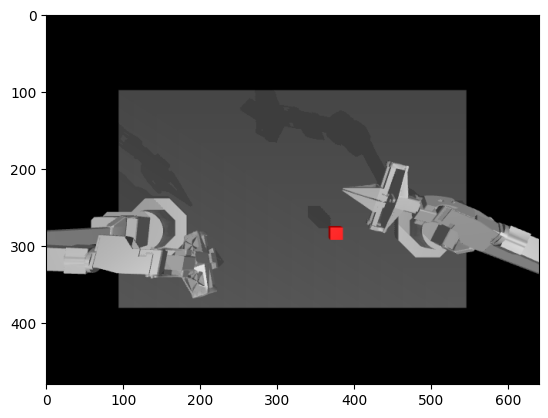

In [48]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

im = Image.fromarray(np.uint8(observation['pixels']['top']))
plt.imshow(im)
plt.show()
